### Зачет. Тема 4 

***Загружаем все необходимые библиотеки***

In [1]:
# Подключаем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Применяем магическую функцию для отображения графиков
%matplotlib inline 

In [3]:
data = pd.read_csv("../Big_Data/wine_reviews.csv")
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek


***Выводим информацию о данных***

In [4]:
# Проверяем общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      20000 non-null  object 
 1   description  20000 non-null  object 
 2   designation  13999 non-null  object 
 3   points       20000 non-null  int64  
 4   price        18198 non-null  float64
 5   province     20000 non-null  object 
 6   region_1     16543 non-null  object 
 7   region_2     8058 non-null   object 
 8   variety      20000 non-null  object 
 9   winery       20000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.5+ MB


In [5]:
data.isna().sum(axis=0) # Считаем количество пропущенных значений в каждом столбце

country            0
description        0
designation     6001
points             0
price           1802
province           0
region_1        3457
region_2       11942
variety            0
winery             0
dtype: int64

**Из приведенной выше таблицы мы можем сделать следующие выводы:**

- Набор данных включает в себя 20 000 строк и 12 столбцов;
- Столбец "points" содержит числовые метки, столбец "price" содержит занчения "float", а остальные 8 столбцов являются объектами;
- 2 признака являются числовыми, остальные 8 являются категориальными;
- Значения отсутствуют в столбцах 'designation', 'price', 'region_1' и 'region_2'; 
- Количество отсутствующих значений по каждому столбцу видно из последней таблицы;

In [6]:
# Смотрим статистическую информацию по объектам int и float
data.describe()

,points,price
count,20000.000000,18198.000000
mean,87.898700,33.206891
std,3.243049,39.716685
min,80.000000,5.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [7]:
data.describe(include=[object])  # Смотрим статистическию информацию по объектам object

,country,description,designation,province,region_1,region_2,variety,winery
count,20000,20000,13999,20000,16543,8058,20000,20000
unique,38,18880,8879,314,877,18,420,7454
top,US,"A bold, assertive Pinot Noir, with a lattice o...",Reserve,California,Napa Valley,Central Coast,Pinot Noir,Williams Selyem
freq,8247,3,340,5901,796,1732,1945,55


**По этой таблице мы можем определить наиболее чато встречающиеся обьекты, определить количество уникальных значений в каждом столбце типа object**

***Проверяем df на дубликаты***

In [8]:
data.duplicated().sum() # Считаем количество дубликатов

1119

***Удаляем дубликаты строк***

In [9]:
print ('Размерность до удаления: ', data.shape) # Выводим размерность ДатаФрейма до удаления строк
data.drop_duplicates(inplace=True, ignore_index=True)
print ('Размерность после удаления: ', data.shape) # Выводим размерность ДатаФрейма после удаления строк

Размерность до удаления:  (20000, 10)
Размерность после удаления:  (18881, 10)


**Видим, что все дубликаты удалилсь верно**

***Визуализируем все пропуски для наглялности***

<AxesSubplot:>

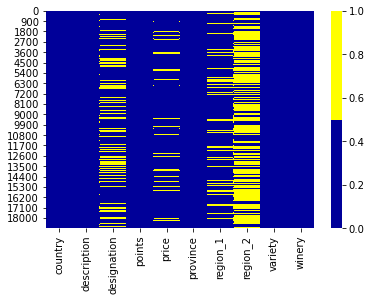

In [10]:
cols = data.columns # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

***Визуализируем пропуски в % по каждому столбцу***

In [11]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

country - 0%
description - 0%
designation - 30%
points - 0%
price - 9%
province - 0%
region_1 - 17%
region_2 - 60%
variety - 0%
winery - 0%


**Анализируем пропуски в столбцах:**
- 60 % - region_2 (винодельческий регион, провинция)
- 30 % - designation (Виноградник, где выращивается виноград для вина)
- 17 % - region_1 (винодельческий регион, провинция, более укрупненно, чем region_2)

**Все эти колонки заполнить не предоставляется возможным и они в нашем анализе не играют большой роли, а тем более у нас есть колонка province (обощающая информацию о том, где производится вино) и заполненна она без пробелов.**

**Поэтому смело их удаляем**

In [12]:
cols_to_drop = ['region_2', 'region_1', 'designation']
data_new = data.drop(cols_to_drop, axis=1)
data_new

,country,description,points,price,province,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",86,23.0,California,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,96,275.0,Tuscany,Red Blend,Castello dei Rampolla
2,France,The great dominance of Cabernet Sauvignon in t...,91,40.0,Bordeaux,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,"The modest cherry, dark berry and black tea no...",81,15.0,Tuscany,Sangiovese,Valiano
4,US,"Exceedingly light in color, scent and flavor, ...",83,25.0,Oregon,Pinot Noir,Deer Creek
...,...,...,...,...,...,...,...
18876,France,"Firm wine, with tannins to match the chunky st...",88,12.0,Southwest France,Mansois,Lionel Osmin & Cie
18877,US,The vineyard is on the Napa side of Carneros. ...,89,50.0,California,Pinot Noir,Bouchaine
18878,Italy,Lighea is a terrific wine and an excellent pai...,87,20.0,Sicily & Sardinia,Zibibbo,Donnafugata
18879,Italy,Organically farmed Cannonau grapes deliver sma...,87,NaN,Sicily & Sardinia,Cannonau,Meloni


**Также мы видим, пропуски есть в столбце price, их не очень много, расчитаем сколько их**

In [13]:
# Расчитаем % оставшихся записей, если пропущенные цены удалим:
total_records = len(data)
missing_prices = data_new['price'].isnull().sum()
missing_ratio = 100 - ((missing_prices / total_records) * 100)
print('Пропущенные записи: {}'.format(missing_prices)+ '\n' +
      'Всего записей: {}'.format(total_records) + '\n' + 
      'Оставшиеся записи составляют: {:.2f}%'.format(missing_ratio))

Пропущенные записи: 1688
Всего записей: 18881
Оставшиеся записи составляют: 91.06%


**Заполним пропущенные price средним значением по points и country**

In [14]:
data_new['price'] = data_new.groupby(['points','country'])['price'].apply(lambda x: x.fillna(x.median()))


In [15]:
data_new[data_new.price.isnull()]  # Проверяем не осталось ли нулевых строк с ценой

,country,description,points,price,province,variety,winery
9547,Portugal,The least interesting wine in the normally exc...,80,NaN,Alentejano,Portuguese Red,Cartuxa
14885,Egypt,"This fresh, approachable Chenin starts with br...",84,NaN,Egypt,Chenin Blanc,Sahara Vineyards


**Две строки у нас не удалились, может быть по этим позициям не возможно расчитать среднее и медиану**

In [16]:
# Уалим эти две строки, скорее всего в них есть какие-то ошибки
data_new = data_new.dropna(how="any", subset=["price"])

In [17]:
data_new[data_new.price.isnull()]  # Проверяем не осталось ли нулевых строк с ценой

,country,description,points,price,province,variety,winery


**Соберем некоторые данные для анализа**

In [18]:
# Выведем все уникальные названия стран:
unique_countries = data_new["country"].unique()
print("Total amount of unique countries: {}".format(len(unique_countries)))
print(unique_countries)

Total amount of unique countries: 37
['US' 'Italy' 'France' 'Austria' 'Chile' 'Spain' 'Australia'
 'South Africa' 'New Zealand' 'Portugal' 'Argentina' 'Germany' 'Greece'
 'Canada' 'Israel' 'Romania' 'Croatia' 'Hungary' 'Mexico' 'Slovenia'
 'Lebanon' 'China' 'Bulgaria' 'Cyprus' 'Uruguay' 'Switzerland' 'Turkey'
 'Georgia' 'Moldova' 'Montenegro' 'Serbia' 'South Korea' 'Ukraine'
 'Bosnia and Herzegovina' 'Brazil' 'US-France' 'Luxembourg']


In [19]:
# Группируем страну по наиболее распространенному сорту сорту вина (первая выводим первые 10 значений)
data_new.groupby("country").variety.max().head(10)


country
Argentina                     White Blend
Australia                       Zinfandel
Austria                          Zweigelt
Bosnia and Herzegovina            Blatina
Brazil                    Sparkling Blend
Bulgaria                         Traminer
Canada                           Viognier
Chile                         White Blend
China                          Chardonnay
Croatia                          Zlahtina
Name: variety, dtype: object

In [20]:
# Группируем баллы по странам, количество, min, max points:
data_new.groupby(['country']).points.agg([len, min, max])

,len,min,max
country,,,
Argentina,685,80,97
Australia,597,80,98
Austria,401,82,96
Bosnia and Herzegovina,1,88,88
Brazil,3,82,85
Bulgaria,9,80,89
Canada,24,82,92
Chile,744,80,93
China,1,82,82


In [21]:
review_totals_by_country = data_new['country'].value_counts().head(25)
print("Считаем вина, какой страны наиболее популярны: \n")
print(review_totals_by_country)

Считаем вина, какой страны наиболее популярны: 

US              7786
Italy           2912
France          2601
Spain           1035
Chile            744
Portugal         705
Argentina        685
Australia        597
New Zealand      412
Austria          401
Germany          337
South Africa     284
Greece           108
Israel            80
Hungary           33
Canada            24
Croatia           20
Romania           18
Slovenia          14
Moldova           14
Mexico            13
Turkey            11
Bulgaria           9
Uruguay            9
Georgia            6
Name: country, dtype: int64


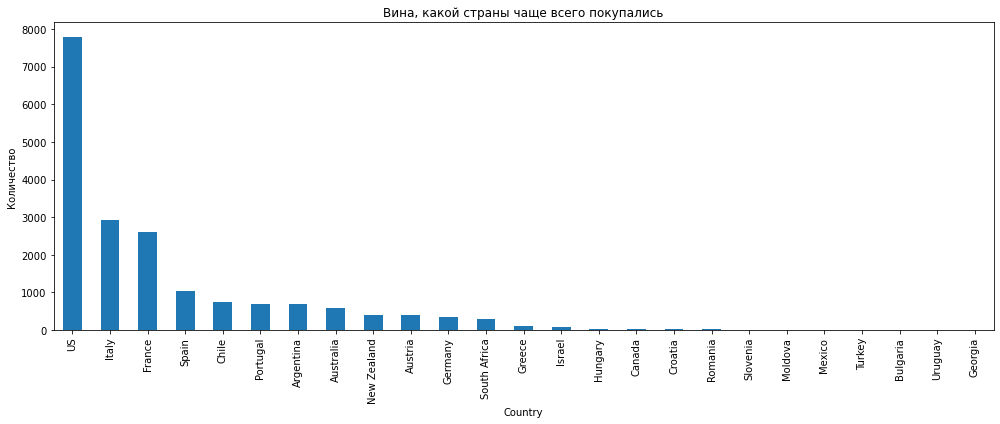

In [22]:
# Строим график средней цены по странам 
fig, ax = plt.subplots(figsize=(14, 6))

data_new['country'].value_counts().head(25)[:25].plot.bar()

# Задаем название осей
ax.set_xlabel('Country')
ax.set_ylabel('Количество')
ax.set_title('Вина, какой страны чаще всего покупались')
fig.tight_layout()

**Выводим график популярности вина в зависимости от страны и от цены**

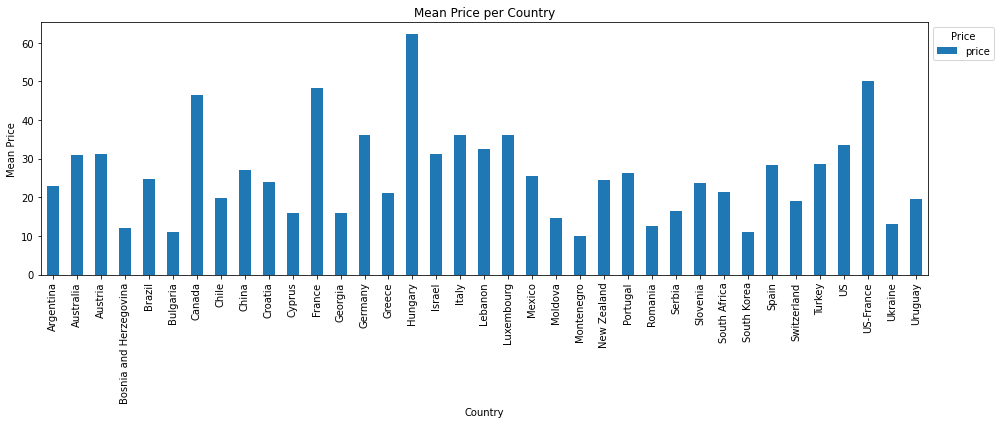

In [23]:
# Строим график средней цены по странам 
fig, ax = plt.subplots(figsize=(14, 6))

data_new.groupby(data_new['country'])['price'].mean().plot.bar()
mean_price = data_new['price'].mean(0)
data_new['price'].fillna(mean_price)

# Задаем название осей
ax.set_xlabel('Country')
ax.set_ylabel('Mean Price')
# Название графика
ax.set_title('Mean Price per Country')
ax.legend(bbox_to_anchor=(1, 1), loc=2, title='Price')

fig.tight_layout()

In [24]:
# Группируем страну и регион, где производится вино
data_new.country + " - " + data_new.province

0                  US - California
1                  Italy - Tuscany
2                France - Bordeaux
3                  Italy - Tuscany
4                      US - Oregon
                   ...            
18876    France - Southwest France
18877              US - California
18878    Italy - Sicily & Sardinia
18879    Italy - Sicily & Sardinia
18880              US - California
Length: 18879, dtype: object

<AxesSubplot:>

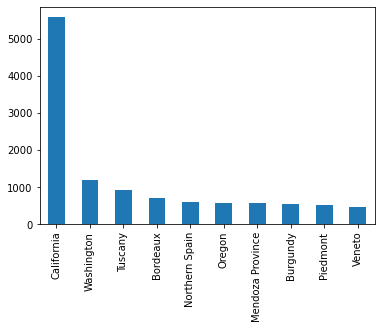

In [25]:
# Отображаем, какой провинции вино покупают чаще всего
data_new['province'].value_counts().head(10).plot.bar()